In [1]:
import tensorflow as tf

In [2]:
fmnist = tf.keras.datasets.fashion_mnist.load_data()

In [3]:
(X, y), (X_test, y_test) = fmnist

In [4]:
X_train, y_train = X[:-5000], y[:-5000]
X_val, y_val = X[-5000:], y[-5000:]

In [5]:
X_train = X_train / 255.
X_val = X_val / 255.
X_test = X_test / 255.

In [6]:
X_train.shape, X_val.shape, X_test.shape

((55000, 28, 28), (5000, 28, 28), (10000, 28, 28))

In [7]:
INPUT_DIM = (28, 28)

In [8]:
tf.random.set_seed(42)

model = tf.keras.Sequential()

model.add(tf.keras.layers.Input(shape=INPUT_DIM))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

2024-01-27 15:44:28.611125: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2024-01-27 15:44:28.611156: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-01-27 15:44:28.611163: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-01-27 15:44:28.611203: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-01-27 15:44:28.611221: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="rmsprop",
    metrics=["accuracy"]
)

In [11]:
hist = model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val), batch_size=32)

Epoch 1/30


2024-01-27 15:44:29.301449: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


1719/1719 [==============================] - 24s 14ms/step - loss: 0.7548 - accuracy: 0.7635 - val_loss: 0.7416 - val_accuracy: 0.7796
Epoch 2/30
1719/1719 [==============================] - 24s 14ms/step - loss: 1.2369 - accuracy: 0.7582 - val_loss: 1.6964 - val_accuracy: 0.7324
Epoch 3/30
1719/1719 [==============================] - 27s 16ms/step - loss: 2.5391 - accuracy: 0.7434 - val_loss: 2.1272 - val_accuracy: 0.7814
Epoch 4/30
1719/1719 [==============================] - 26s 15ms/step - loss: 4.6965 - accuracy: 0.7310 - val_loss: 4.9809 - val_accuracy: 0.7638
Epoch 5/30
1719/1719 [==============================] - 23s 13ms/step - loss: 7.6028 - accuracy: 0.7259 - val_loss: 9.3319 - val_accuracy: 0.7348
Epoch 6/30
1719/1719 [==============================] - 24s 14ms/step - loss: 11.3049 - accuracy: 0.7288 - val_loss: 14.3721 - val_accuracy: 0.6958
Epoch 7/30
1719/1719 [==============================] - 25s 15ms/step - loss: 15.4287 - accuracy: 0.7294 - val_loss: 14.7565 - val_ac

In [12]:
model.predict(X_test[:1])

1/1 [==============================] - 0s 76ms/step


array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 6.1822414e-17,
        0.0000000e+00, 1.0000000e+00]], dtype=float32)

In [13]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 280.1451 - accuracy: 0.7190


[280.1451110839844, 0.718999981880188]

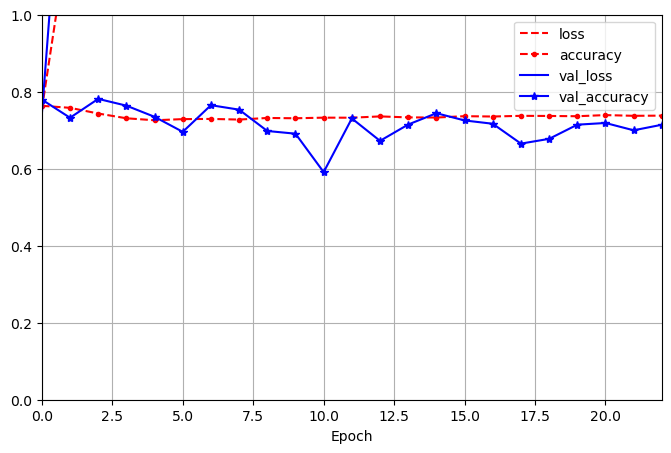

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(hist.history).plot(
    figsize=(8, 5), xlim=(0, 22), ylim=(0, 1), grid=True, xlabel="Epoch", style=["r--", "r--.", "b-", "b-*"]
)
plt.show()